# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Opening the world bank data as a Pandas table/dataframe and analysing the contents
df = pd.read_json('data/world_bank_projects.json')
df.head()


,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [4]:
# The data consists of 500 rows and 50 columns.
df.shape

(500, 50)

In [5]:
df.info()
# It can be observed that many columns contains missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [6]:
# Checking which columns have how many missing values
nulls = {col: (df[col].isnull().sum()) for col in df.columns}
nulls

{'_id': 0,
 'approvalfy': 0,
 'board_approval_month': 0,
 'boardapprovaldate': 0,
 'borrower': 15,
 'closingdate': 130,
 'country_namecode': 0,
 'countrycode': 0,
 'countryname': 0,
 'countryshortname': 0,
 'docty': 54,
 'envassesmentcategorycode': 70,
 'grantamt': 0,
 'ibrdcommamt': 0,
 'id': 0,
 'idacommamt': 0,
 'impagency': 28,
 'lendinginstr': 5,
 'lendinginstrtype': 5,
 'lendprojectcost': 0,
 'majorsector_percent': 0,
 'mjsector_namecode': 0,
 'mjtheme': 9,
 'mjtheme_namecode': 0,
 'mjthemecode': 0,
 'prodline': 0,
 'prodlinetext': 0,
 'productlinetype': 0,
 'project_abstract': 138,
 'project_name': 0,
 'projectdocs': 54,
 'projectfinancialtype': 0,
 'projectstatusdisplay': 0,
 'regionname': 0,
 'sector': 0,
 'sector1': 0,
 'sector2': 120,
 'sector3': 235,
 'sector4': 326,
 'sector_namecode': 0,
 'sectorcode': 0,
 'source': 0,
 'status': 0,
 'supplementprojectflg': 2,
 'theme1': 0,
 'theme_namecode': 9,
 'themecode': 9,
 'totalamt': 0,
 'totalcommamt': 0,
 'url': 0}

In [7]:
# Getting names of all the columns.
# The columns "countrycode"/"countryname" can uniquely define the different countries and also doesn't have any missing values. 
df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

## 1. Find the 10 countries with most projects

In [46]:
# We know that each entry in the table is relevant to a country and the project details. 
# We can group using countries and use the aggregator size() to get the total no of values for each country.
# To get the top 10 countries we can sort the values in descending order.
result = df.groupby("countryname").size()
result2 = result.sort_values(ascending = False)[:10]
result2

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

Text(0, 0.5, '')

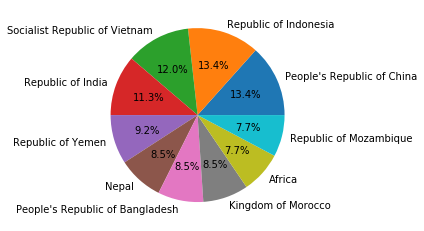

In [57]:
result2.plot(kind = "pie", autopct = "%1.1f%%")
# To remove the None label on y axis, we can set it to empty
plt.ylabel("")

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [39]:
# When I tried the below code, it gave me an error stating "unhashable type: list" 
# Which means that the values in the column are of list type
# Thus, groupby() cannot be applied on that list.
result2 = df.groupby(["mjtheme_namecode"]).size()
result2.sort_values(ascending=False)[:10]

In [15]:
# To verify, we check that "mjtheme_namecode" indeed has values as list
# We can also verify that this entry has a code with no name
df["mjtheme_namecode"][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [16]:
# To fill missing names in "mjtheme_namecode" column, we need to seprate/flatten the column values

In [18]:
import json
from pandas.io.json import json_normalize
data = json.load((open('data/world_bank_projects.json')))
dfx = json_normalize(data, 'mjtheme_namecode')
print(dfx.shape)
dfx.head()

(1499, 2)


,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [19]:
# Here, we can just verify which code values have how many null name values
# We can see that code values ranges from 1 to 11 for which there are missing values
dfx[dfx["name"] == ""].groupby("code").size()


code
1      5
10    14
11    27
2     15
3      3
4     16
5      5
6     10
7     11
8     13
9      3
dtype: int64

In [20]:
# We need to create another dataframe with each unique code and name
# First, drop empty name values
dfy = dfx[dfx["name"] != "" ]
dfy.head()

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance


In [28]:
# Second, get unique code:name
# We can use these name values to fill the missing values
# One thing to note here is that we have name values for code values ranging from 1 to 11
# This means that we can use these values to fill the missing values
dfy = dfy.drop_duplicates()

In [29]:
dfy.shape

(11, 2)

In [33]:
# We can merge dfx and dfy dataframs on "code" column 
merged = pd.merge(dfx,dfy, on = "code")
merged.head()

,code,name_x,name_y
0,8,Human development,Human development
1,8,,Human development
2,8,Human development,Human development
3,8,Human development,Human development
4,8,Human development,Human development


In [34]:
merged.shape

(1499, 3)

In [40]:
# Now we have a merged table of all the codes in the columns along with their name values.
# However, we need to get rid of name_x cloumn since it is of no use.
merged = merged[["code", "name_y"]]

#To get the top 10 project theme, we can group by using name column
result3 = merged.groupby("name_y").size().sort_values(ascending = False)[:10]
result3

name_y
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
dtype: int64

Text(0, 0.5, 'Frequency')

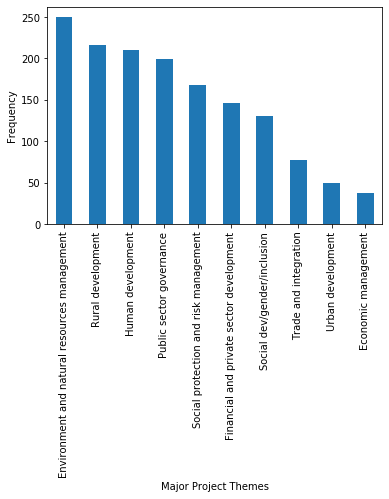

In [58]:
result3.plot(kind="bar")
plt.xlabel("Major Project Themes")
plt.ylabel("Frequency")